In [247]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [248]:
payments=pd.read_csv(r'C:\DE\csv files data\Brazilian E-Commerce\Cleanedolist_order_payments_dataset.csv')
products=pd.read_csv(r'C:\DE\csv files data\Brazilian E-Commerce\Cleanedolist_products_dataset_cleaned.csv')
reviews=pd.read_csv(r'C:\DE\csv files data\Brazilian E-Commerce\Cleanedolist_order_reviews_dataset.csv')
orders_dataset=pd.read_csv(r'C:\DE\csv files data\Brazilian E-Commerce\Cleanedolist_orders_dataset.csv')
order_items=pd.read_csv(r'C:\DE\csv files data\Brazilian E-Commerce\Cleanedolist_order_items_dataset.csv')
sellers=pd.read_csv(r'C:\DE\csv files data\Brazilian E-Commerce\Cleaned_olist_sellers_dataset.csv')
customers=pd.read_csv(r'C:\DE\csv files data\Brazilian E-Commerce\cleaned_olist_customers_dataset.csv')
geolocation = pd.read_csv(r'C:\DE\csv files data\Brazilian E-Commerce\Cleanedolist_geolocation_dataset.csv')
product_category_name=pd.read_csv(r'C:\DE\csv files data\Brazilian E-Commerce\Cleaned_product_category_name_translation.csv')

PAYMENTS DATASET......

In [249]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,Credit_Card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,Credit_Card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,Credit_Card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,Credit_Card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,Credit_Card,2,128.45


- Plot: Histogram or KDE plot (sns.histplot, sns.kdeplot)
- Insight: Understand how payment amounts are spread—are most payments small?
 Are there outliers?







<Axes: xlabel='payment_value', ylabel='Count'>

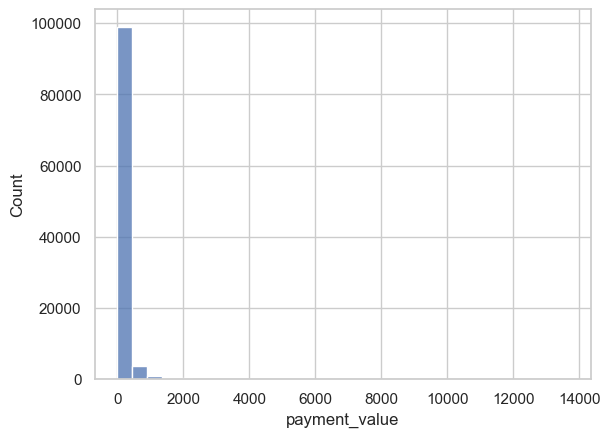

In [250]:
sns.histplot(payments['payment_value'], bins=30, kde=False)

<Axes: xlabel='payment_value', ylabel='Count'>

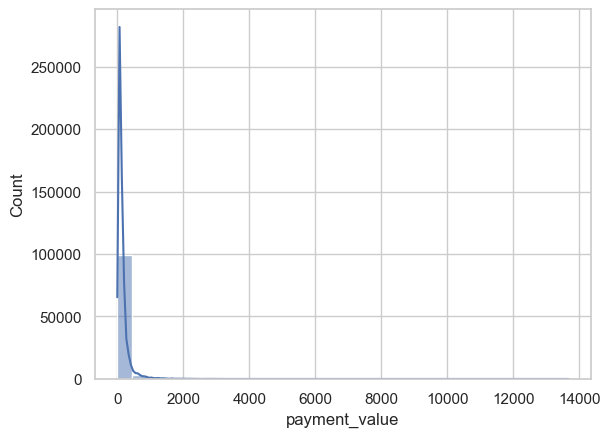

In [251]:
sns.histplot(payments['payment_value'], bins=30, kde=True)

 Installments vs Payment Value
- Plot: Scatter plot or boxplot
- Insight: See if higher installments correlate with higher payment values.







<Axes: xlabel='payment_installments', ylabel='payment_value'>

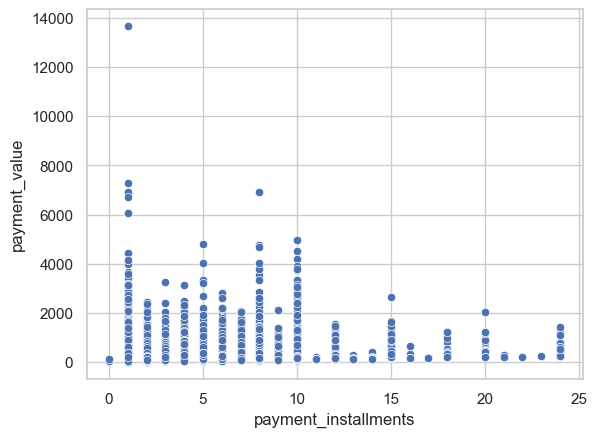

In [252]:
sns.scatterplot(x='payment_installments', y='payment_value', data=payments)

<Axes: xlabel='payment_installments', ylabel='payment_value'>

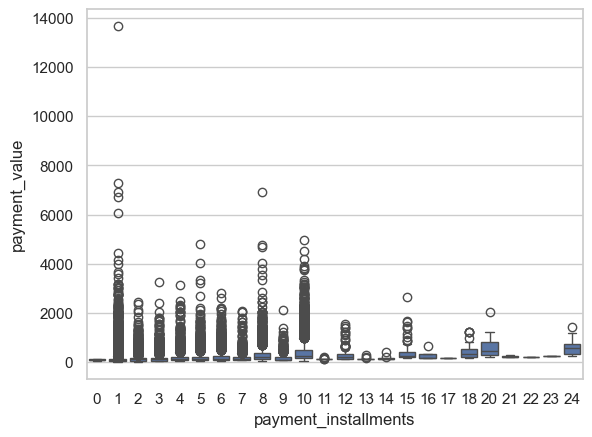

In [253]:
sns.boxplot(x='payment_installments', y='payment_value', data=payments)

 Payment Type Frequency
- Plot: Count plot or pie chart
- Insight: Even though your sample shows only "Credit Card", the full dataset might include others like "Boleto", "Voucher", etc.


<Axes: xlabel='payment_type', ylabel='count'>

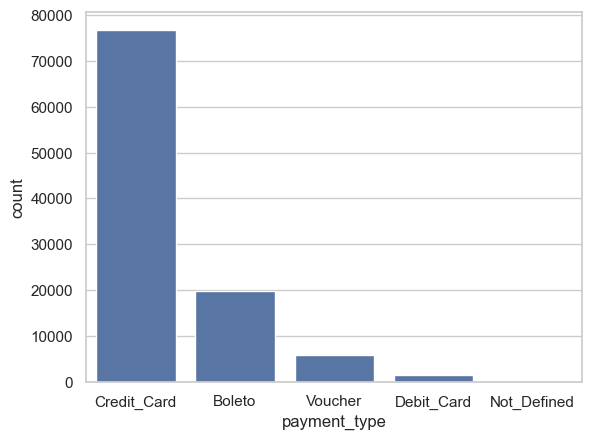

In [254]:
sns.countplot(x='payment_type', data=payments)

 Sequential Payments Analysis
- Plot: Line plot or bar plot
- Insight: If payment_sequential indicates multiple payments per order, you can analyze how often that happens.


<Axes: xlabel='payment_sequential', ylabel='count'>

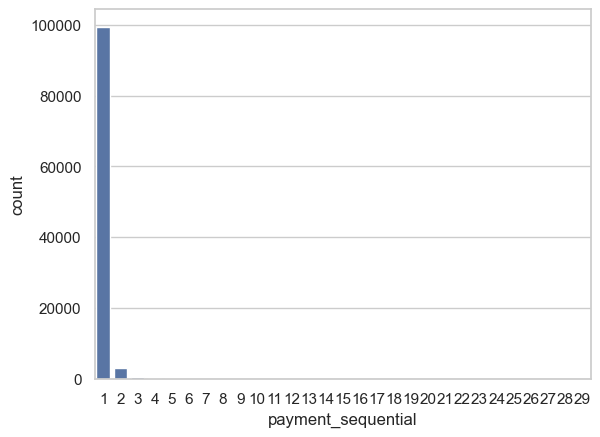

In [255]:
sns.countplot(x='payment_sequential', data=payments)

lets understand the product dataset.....

In [256]:
products.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [257]:
products.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

 1. Category Distribution
- Plot: Bar chart of product_category_name frequency
- Insight: See which product categories dominate the catalog.


<Axes: xlabel='count', ylabel='product_category_name'>

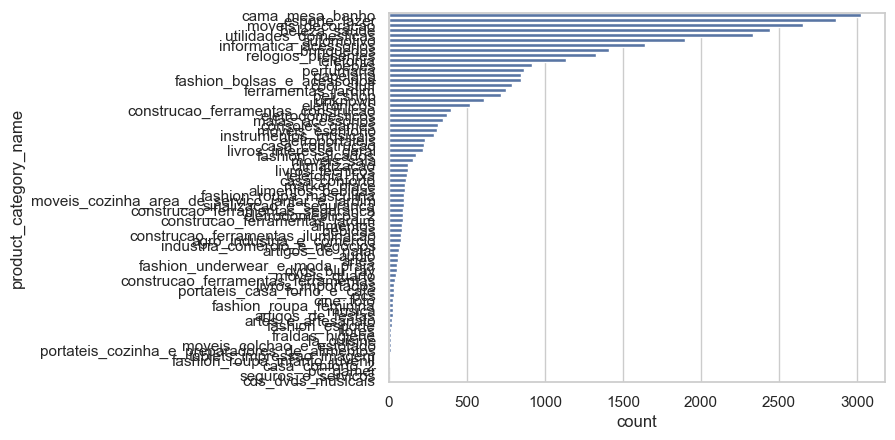

In [258]:

sns.countplot(y='product_category_name', data=products, order=products['product_category_name'].value_counts().index)

<Axes: xlabel='product_category_name', ylabel='product_weight_g'>

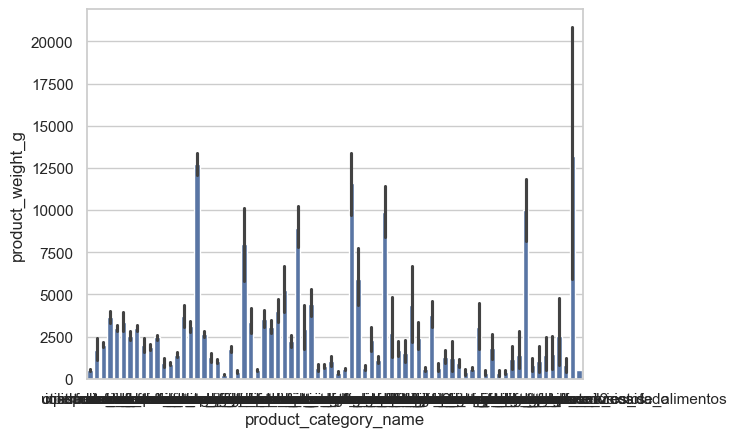

In [259]:
sns.barplot(x='product_category_name', y='product_weight_g', data=products)

 2. Name vs Description Length
- Plot: Scatter plot or jointplot
- Insight: Explore whether longer product names tend to have longer descriptions.







In [260]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


<Axes: xlabel='product_name_lenght', ylabel='product_description_lenght'>

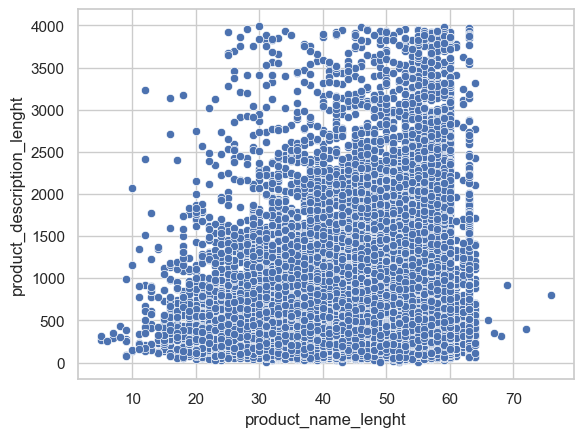

In [261]:
sns.scatterplot(x='product_name_lenght', y='product_description_lenght', data=products)

3. Photo Quantity Distribution
- Plot: Histogram or boxplot
- Insight: Understand how many photos products typically have—are most single-photo listings?






<Axes: xlabel='product_photos_qty', ylabel='Count'>

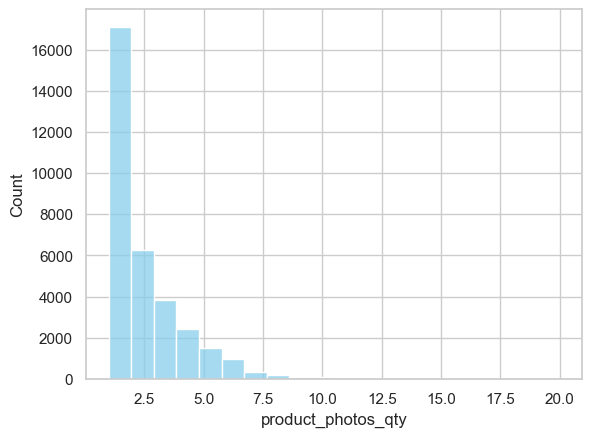

In [262]:
sns.histplot(products["product_photos_qty"], bins=20, kde=False, color="skyblue")

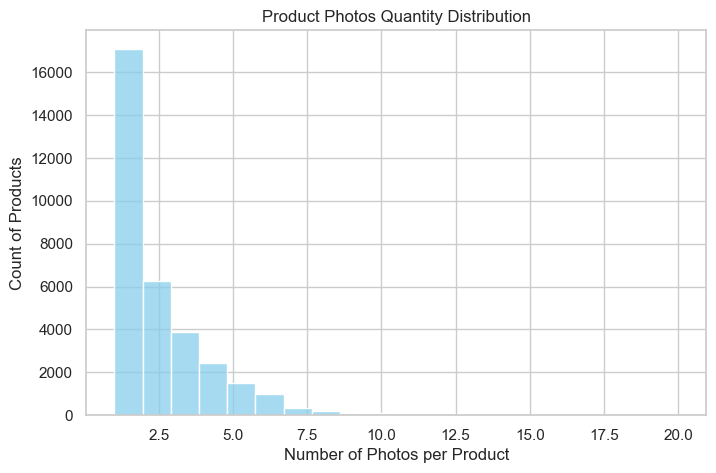

In [263]:
plt.figure(figsize=(8,5))
sns.histplot(products["product_photos_qty"], bins=20, kde=False, color="skyblue")
plt.title("Product Photos Quantity Distribution")
plt.xlabel("Number of Photos per Product")
plt.ylabel("Count of Products")
plt.show()


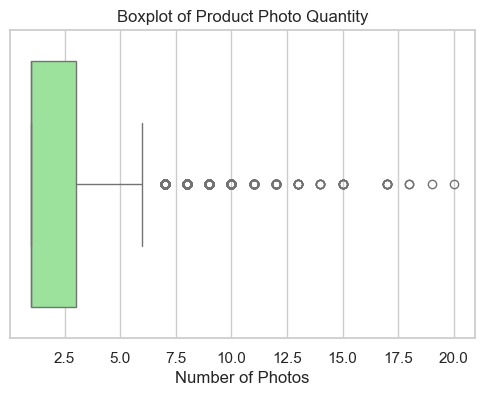

In [264]:
plt.figure(figsize=(6,4))
sns.boxplot(x=products["product_photos_qty"], color="lightgreen")
plt.title("Boxplot of Product Photo Quantity")
plt.xlabel("Number of Photos")
plt.show()

<Axes: xlabel='product_photos_qty', ylabel='product_photos_qty'>

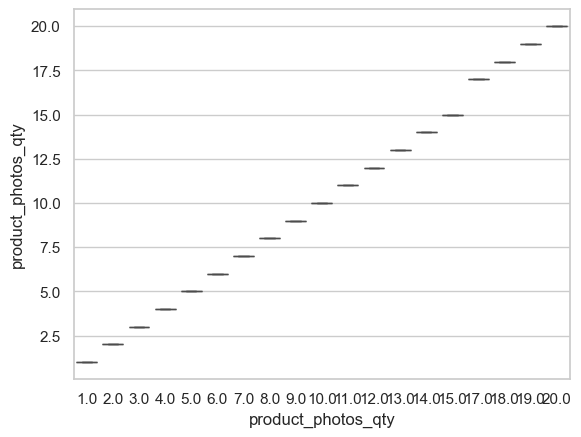

In [265]:
sns.boxplot(x='product_photos_qty',y='product_photos_qty', data=products)

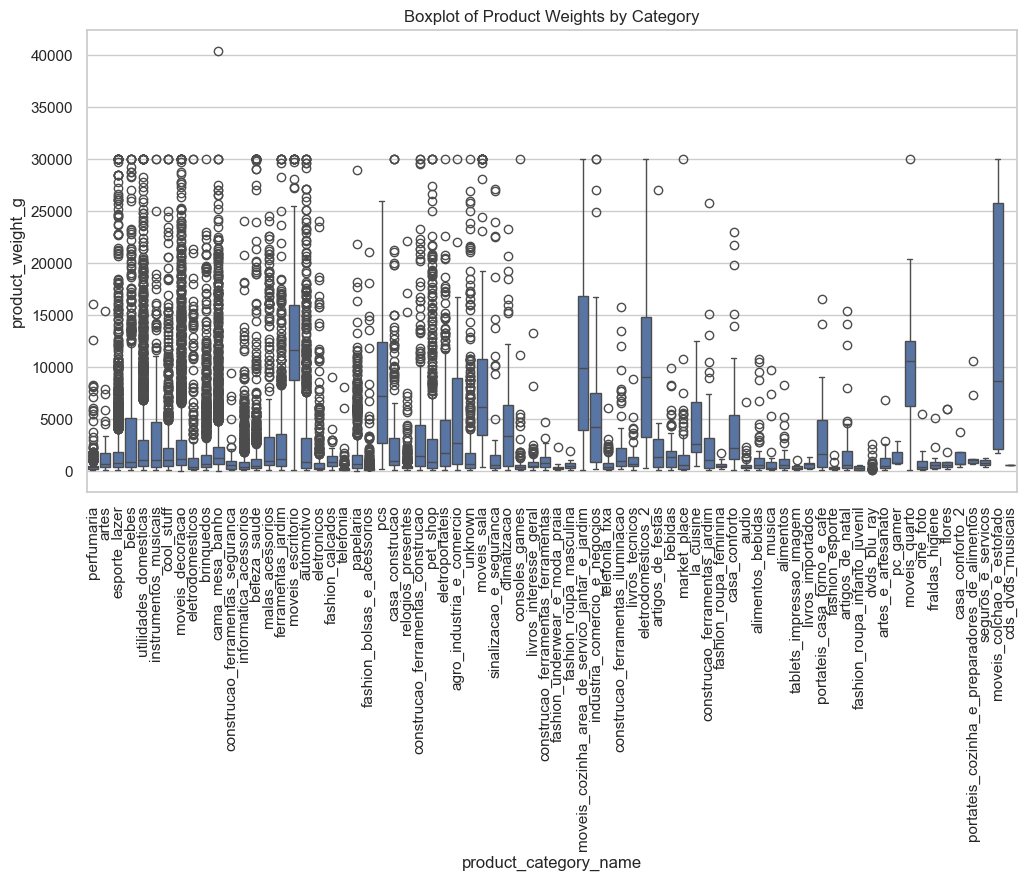

In [266]:
plt.figure(figsize=(12,6))
sns.boxplot(x="product_category_name", y="product_weight_g", data=products)
plt.xticks(rotation=90)
plt.title("Boxplot of Product Weights by Category")
plt.show()


5. Product Dimensions
- Plot: Pairplot of length, height, width
- Insight: Spot dimensional clusters or outliers—great for warehouse optimization.







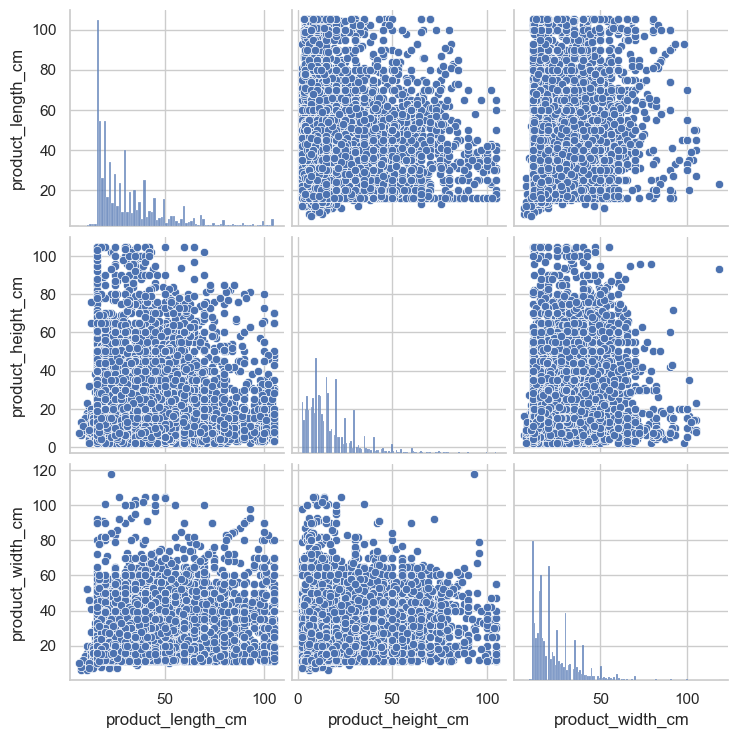

In [267]:
sns.pairplot(products[['product_length_cm', 'product_height_cm', 'product_width_cm']])

Visualizing Review Dataset......

In [268]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,No Review,No Review,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,No Review,No Review,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,No Review,No Review,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,No Review,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,No Review,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


 1. Review Score Distribution
- Plot: Histogram or countplot
- Insight: See how customers are rating their experience—are 5-star reviews dominant or is there a spread?
sns.countplot(x='review_score', data=reviews)






<Axes: xlabel='review_score', ylabel='count'>

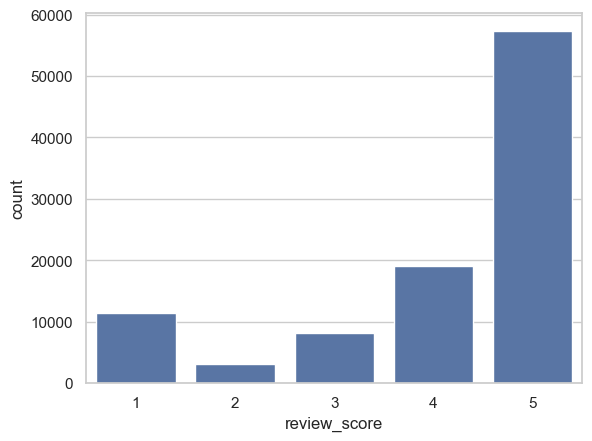

In [269]:
sns.countplot(x='review_score', data=reviews)

 2. Review Creation Over Time
- Plot: Line plot or time series
- Insight: Track review volume trends—spikes may indicate seasonal demand or issues.






Answer description....>
1. set_index('review_creation_date')
- You're telling pandas: “Make the review creation date the index of the DataFrame.”
- This is required for time-based operations like resampling.
- It transforms your DataFrame into a time-indexed series, which is ideal for temporal analysis.
2. .resample('M')
- This groups the data by calendar month ('M' stands for monthly frequency).
- You could also use 'W' for weekly, 'D' for daily, 'Q' for quarterly, etc.
- It’s like saying: “Let’s bucket all reviews into monthly groups.”
3. .size()
- This counts how many reviews fall into each monthly bucket.
- It returns a Series where each entry is the number of reviews in that month.
4. .plot()
- Finally, it visualizes the monthly review counts as a line chart.
- You get a clear picture of review volume trends over time.


C:\Users\rs573\AppData\Local\Temp\ipykernel_27056\1295540033.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  reviews.set_index('review_creation_date').resample('M').size().plot()


<Axes: xlabel='review_creation_date'>

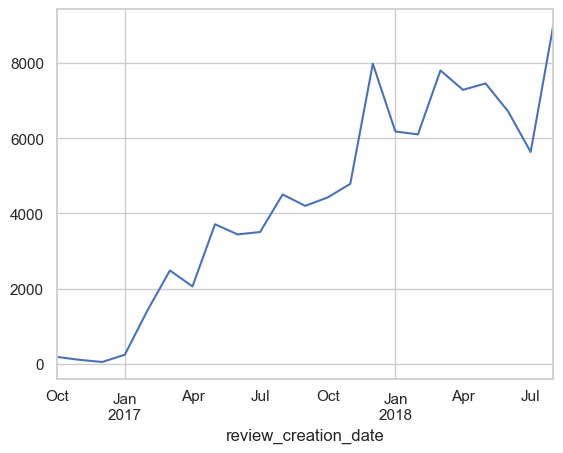

In [270]:
reviews['review_creation_date'] = pd.to_datetime(reviews['review_creation_date'])
reviews.set_index('review_creation_date').resample('M').size().plot()

 3. Response Time Analysis
- Plot: Histogram of response delays
- Insight: Measure how quickly reviews are answered—great for evaluating customer service responsiveness.




<Axes: xlabel='response_delay', ylabel='Count'>

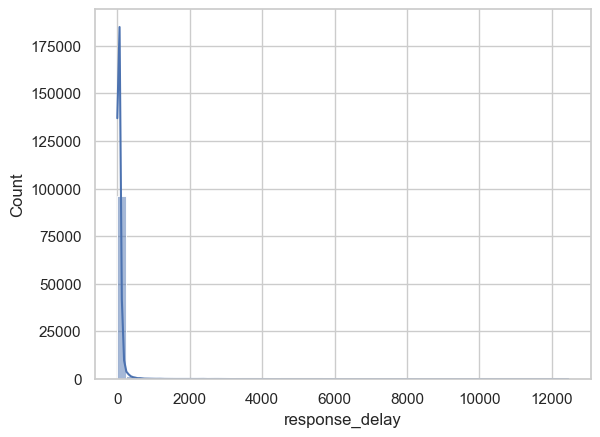

In [271]:
reviews['review_answer_timestamp'] = pd.to_datetime(reviews['review_answer_timestamp'])
reviews['response_delay'] = (reviews['review_answer_timestamp'] - reviews['review_creation_date']).dt.total_seconds() / 3600
sns.histplot(reviews['response_delay'], bins=50,kde=True)


 4. Textual Review Presence
- Plot: Bar chart of reviews with/without messages
- Insight: Understand how many reviews contain actual feedback vs just scores.







<Axes: xlabel='has_message', ylabel='count'>

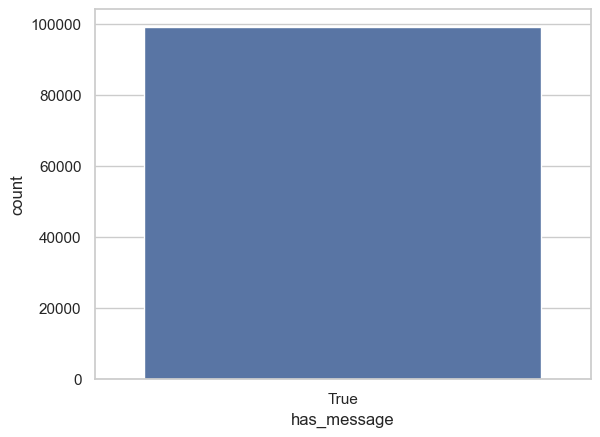

In [272]:
reviews['has_message'] = reviews['review_comment_message'].notna() & (reviews['review_comment_message'] != 'No review')
sns.countplot(x='has_message', data=reviews)

Orders dataset.....

In [273]:
orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,approval_time_hours,carrier_delivery_time_hours,customer_delivery_time_hours
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0.178333,56.974167,202.477778
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,30.713889,41.823056,330.768889
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0.276111,5.186389,225.461111
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0.298056,90.198056,317.010000
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.030556,22.465278,68.973056


In [274]:
orders_dataset.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'approval_time_hours', 'carrier_delivery_time_hours',
       'customer_delivery_time_hours'],
      dtype='object')

In [275]:
# Ensure datetime conversion
orders_dataset['order_purchase_timestamp'] = pd.to_datetime(orders_dataset['order_purchase_timestamp'])
orders_dataset['order_approved_at'] = pd.to_datetime(orders_dataset['order_approved_at'])
orders_dataset['order_delivered_carrier_date'] = pd.to_datetime(orders_dataset['order_delivered_carrier_date'])
orders_dataset['order_delivered_customer_date'] = pd.to_datetime(orders_dataset['order_delivered_customer_date'])
orders_dataset['order_estimated_delivery_date'] = pd.to_datetime(orders_dataset['order_estimated_delivery_date'])



# 1. Order Status Distribution

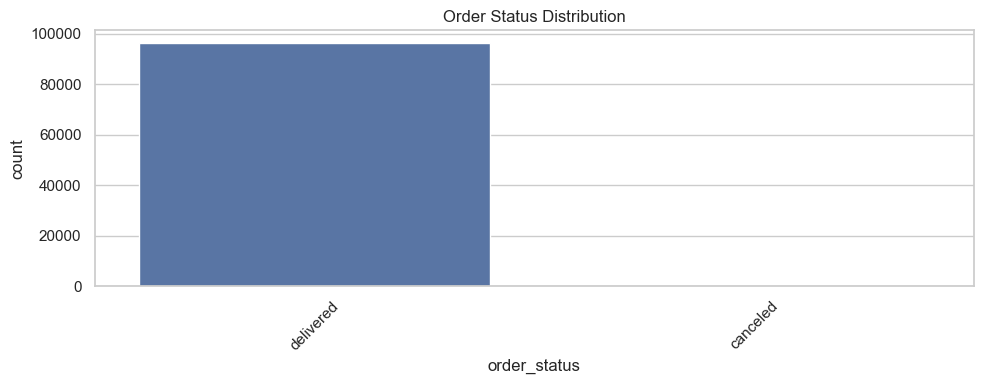

In [276]:

plt.figure(figsize=(10, 4))
sns.countplot(x='order_status', data=orders_dataset, order=orders_dataset['order_status'].value_counts().index)
plt.title('Order Status Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


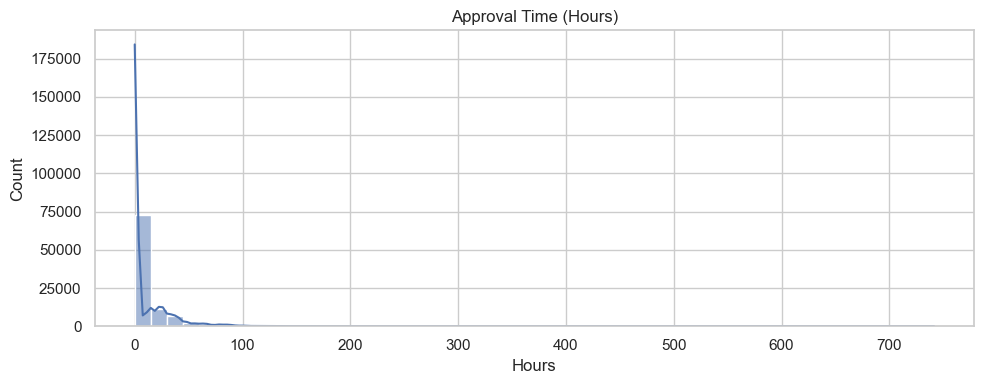

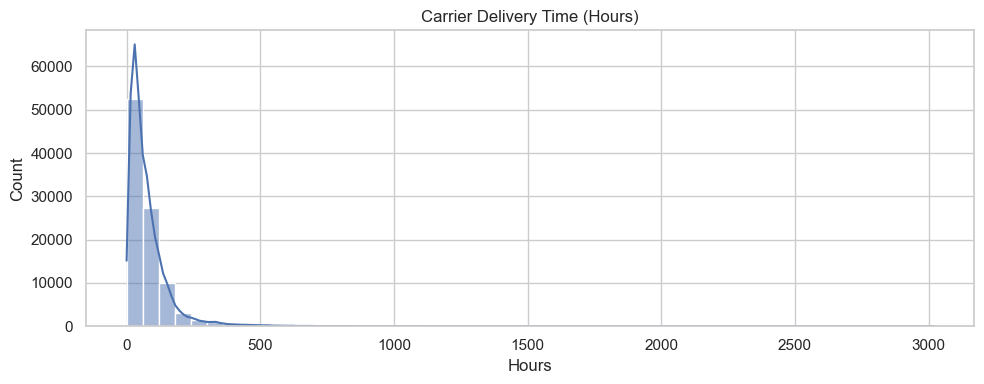

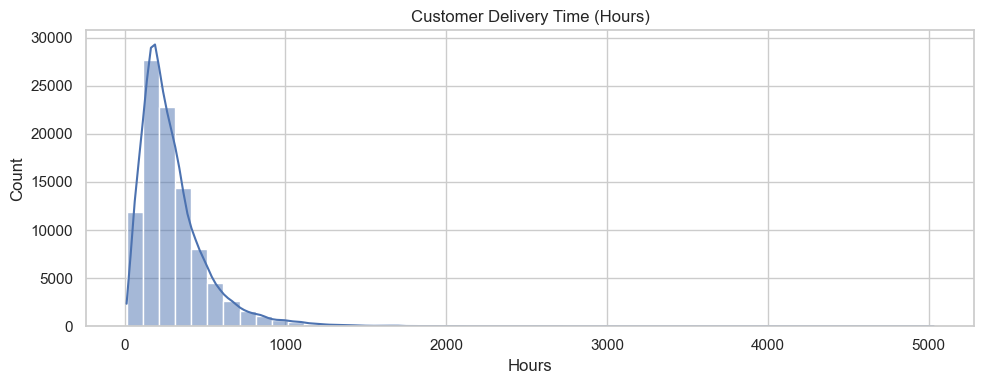

C:\Users\rs573\AppData\Local\Temp\ipykernel_27056\1598412550.py:26: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders = orders_dataset.set_index('order_purchase_timestamp').resample('M').size()


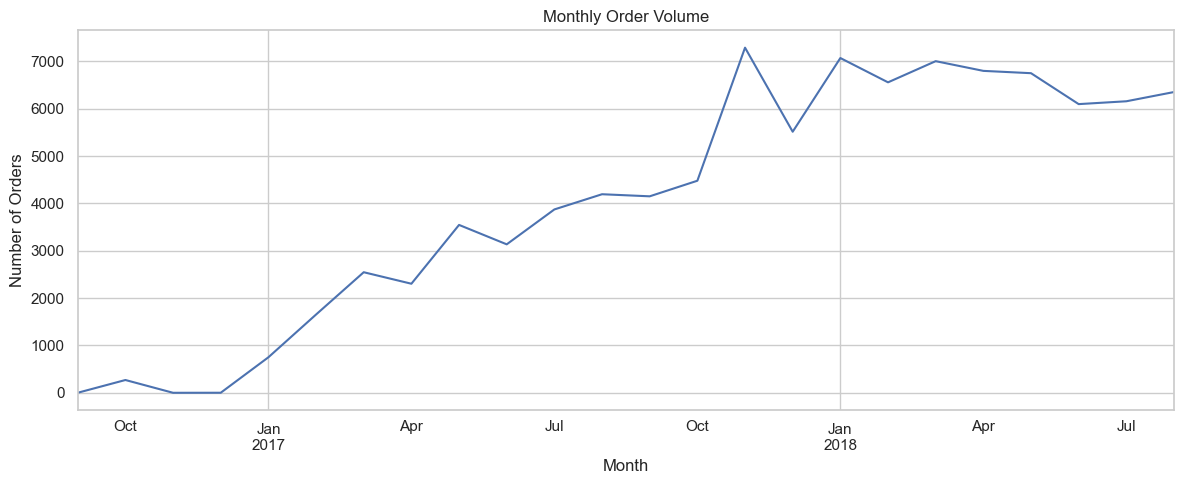

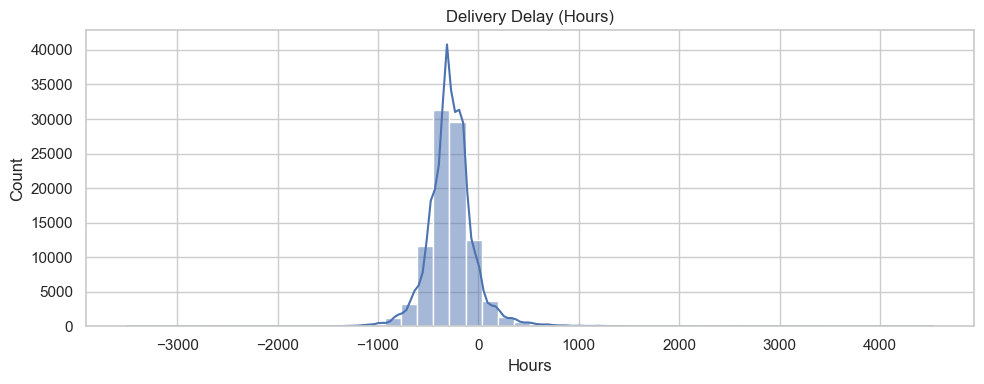

In [277]:
# 2. Approval Time Distribution
plt.figure(figsize=(10, 4))
sns.histplot(orders_dataset['approval_time_hours'], bins=50, kde=True)
plt.title('Approval Time (Hours)')
plt.xlabel('Hours')
plt.tight_layout()
plt.show()

# 3. Carrier Delivery Time Distribution
plt.figure(figsize=(10, 4))
sns.histplot(orders_dataset['carrier_delivery_time_hours'], bins=50, kde=True)
plt.title('Carrier Delivery Time (Hours)')
plt.xlabel('Hours')
plt.tight_layout()
plt.show()

# 4. Customer Delivery Time Distribution
plt.figure(figsize=(10, 4))
sns.histplot(orders_dataset['customer_delivery_time_hours'], bins=50, kde=True)
plt.title('Customer Delivery Time (Hours)')
plt.xlabel('Hours')
plt.tight_layout()
plt.show()

# 5. Monthly Order Volume
monthly_orders = orders_dataset.set_index('order_purchase_timestamp').resample('M').size()
plt.figure(figsize=(12, 5))
monthly_orders.plot()
plt.title('Monthly Order Volume')
plt.ylabel('Number of Orders')
plt.xlabel('Month')
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. Delay vs Estimated Delivery
orders_dataset['delay_hours'] = (
    orders_dataset['order_delivered_customer_date'] - orders_dataset['order_estimated_delivery_date']
).dt.total_seconds() / 3600

plt.figure(figsize=(10, 4))
sns.histplot(orders_dataset['delay_hours'], bins=50, kde=True)
plt.title('Delivery Delay (Hours)')
plt.xlabel('Hours')
plt.tight_layout()
plt.show()

order_items Dataset.....

Possible Visualizations
1. Order Status

Plot: Countplot / Bar chart (order_status)

Insight: Distribution of orders (delivered, canceled, shipped, etc.)

2. Purchase Trends Over Time

Column: order_purchase_timestamp

Plot: Line plot or bar plot (group by month/year)

Insight: Seasonal trends (e.g., are sales higher during holidays?)

3. Approval Time Analysis

Column: approval_time_hours

Plot: Histogram or boxplot

Insight: How quickly are orders approved? Are there outliers (delays)?

4. Carrier Delivery Time

Column: carrier_delivery_time_hours

Plot: Histogram / KDE plot

Insight: Typical time taken by carrier to ship orders.

5. Customer Delivery Time

Column: customer_delivery_time_hours

Plot: Boxplot grouped by order_status

Insight: How long customers wait for delivered orders vs canceled/others.

In [278]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_item_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,218.04


In [279]:
order_items.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'total_item_value'],
      dtype='object')

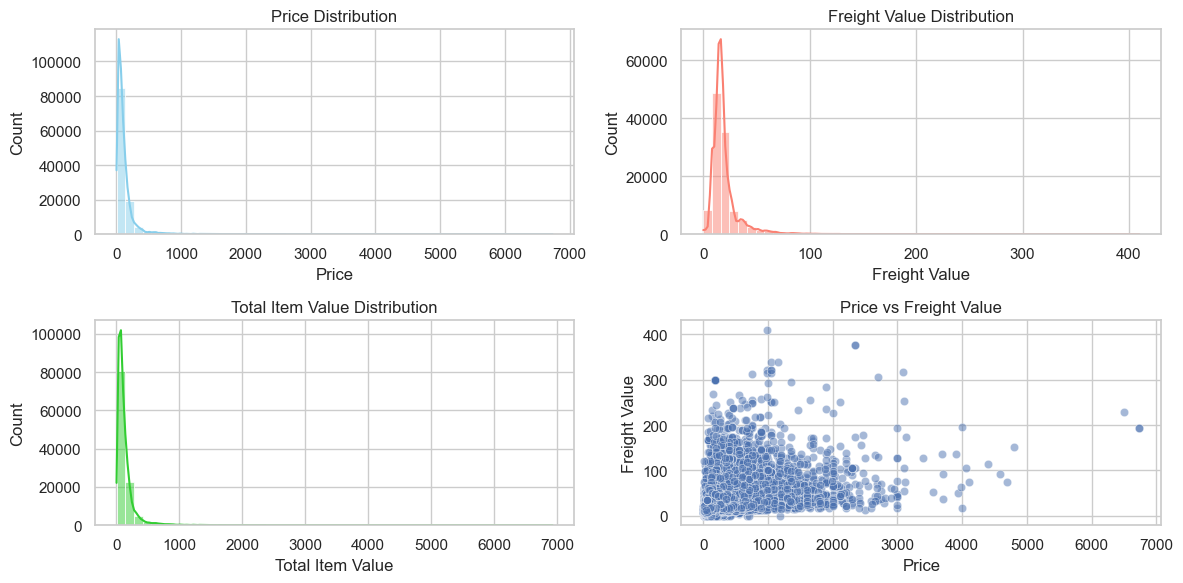

C:\Users\rs573\AppData\Local\Temp\ipykernel_27056\4077800887.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sellers.index, y=top_sellers.values, palette='viridis')


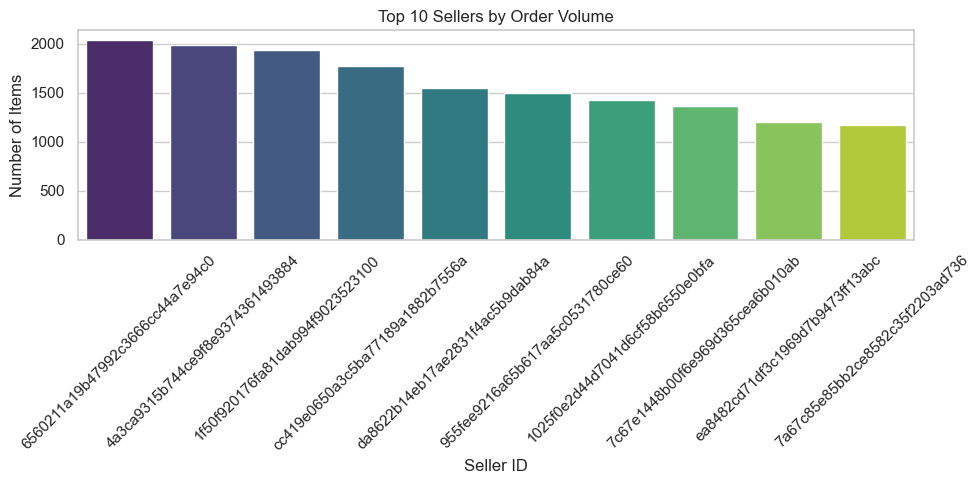

C:\Users\rs573\AppData\Local\Temp\ipykernel_27056\4077800887.py:48: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  shipping_trend = order_items.set_index('shipping_limit_date').resample('M').size()


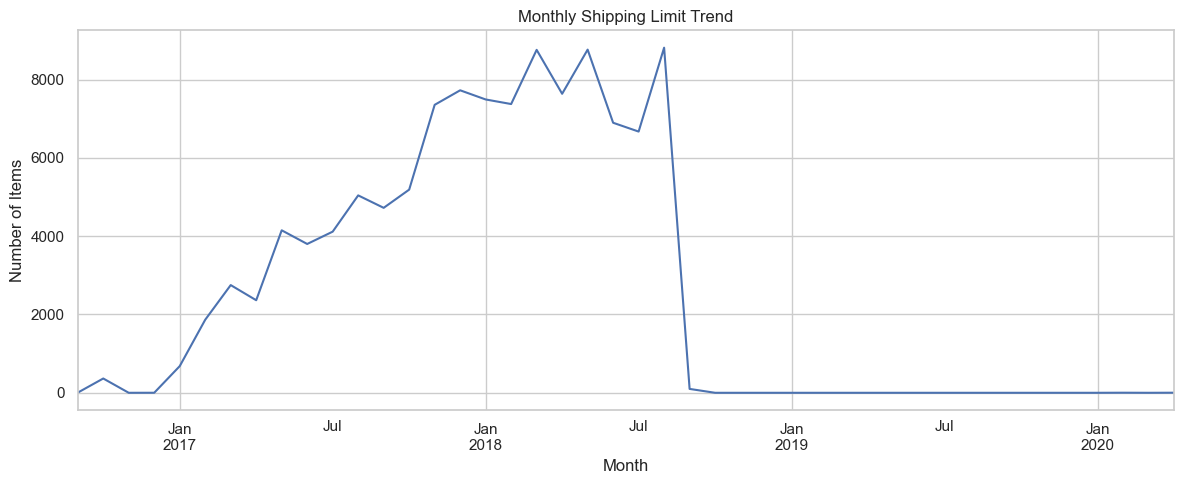

In [280]:


# Optional: Convert shipping_limit_date to datetime if needed
order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'])

# Set plot style
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))

# 1. Price Distribution
plt.subplot(2, 2, 1)
sns.histplot(order_items['price'], bins=50, kde=True, color='skyblue')
plt.title('Price Distribution')
plt.xlabel('Price')

# 2. Freight Value Distribution
plt.subplot(2, 2, 2)
sns.histplot(order_items['freight_value'], bins=50, kde=True, color='salmon')
plt.title('Freight Value Distribution')
plt.xlabel('Freight Value')

# 3. Total Item Value Distribution
plt.subplot(2, 2, 3)
sns.histplot(order_items['total_item_value'], bins=50, kde=True, color='limegreen')
plt.title('Total Item Value Distribution')
plt.xlabel('Total Item Value')

# 4. Price vs Freight Value (Correlation)
plt.subplot(2, 2, 4)
sns.scatterplot(x='price', y='freight_value', data=order_items, alpha=0.5)
plt.title('Price vs Freight Value')
plt.xlabel('Price')
plt.ylabel('Freight Value')

plt.tight_layout()
plt.show()

# 5. Top Sellers by Volume
top_sellers = order_items['seller_id'].value_counts().nlargest(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_sellers.index, y=top_sellers.values, palette='viridis')
plt.title('Top 10 Sellers by Order Volume')
plt.xlabel('Seller ID')
plt.ylabel('Number of Items')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6. Shipping Deadline Trend Over Time
shipping_trend = order_items.set_index('shipping_limit_date').resample('M').size()
plt.figure(figsize=(12, 5))
shipping_trend.plot()
plt.title('Monthly Shipping Limit Trend')
plt.ylabel('Number of Items')
plt.xlabel('Month')
plt.grid(True)
plt.tight_layout()
plt.show()

sellers datasets.....

In [281]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


 Visualize Seller Distribution by City


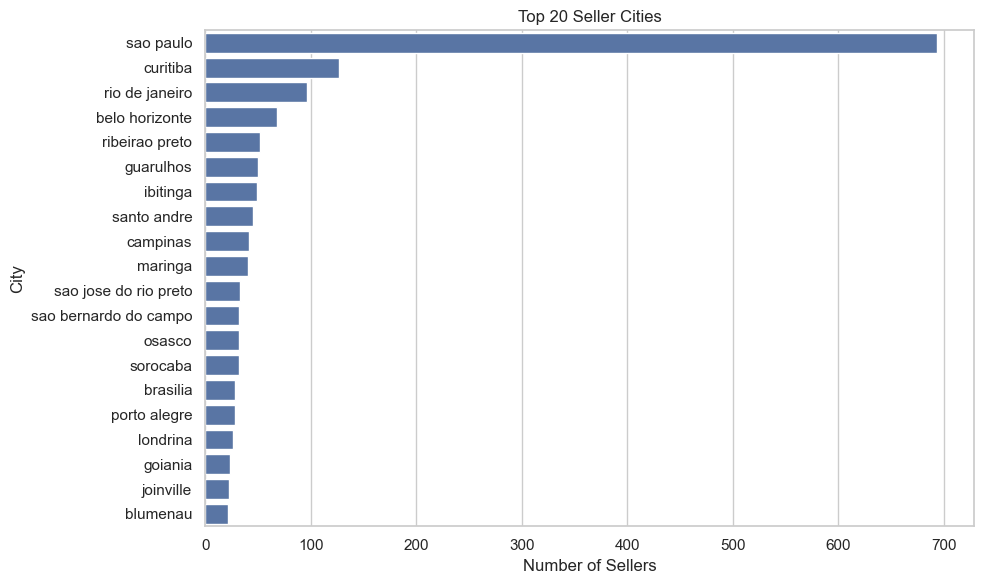

In [282]:
plt.figure(figsize=(10, 6))
top_cities = sellers['seller_city'].value_counts().nlargest(20)
sns.barplot(y=top_cities.index, x=top_cities.values)
plt.title('Top 20 Seller Cities')
plt.xlabel('Number of Sellers')
plt.ylabel('City')
plt.tight_layout()
plt.show()

Seller Distribution by State
This gives a broader regional view.

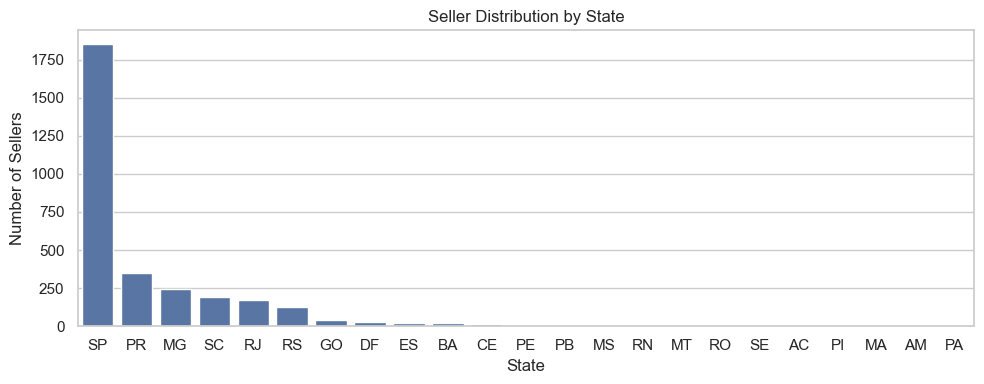

In [283]:
plt.figure(figsize=(10, 4))
sns.countplot(x='seller_state', data=sellers, order=sellers['seller_state'].value_counts().index)
plt.title('Seller Distribution by State')
plt.xlabel('State')
plt.ylabel('Number of Sellers')
plt.tight_layout()
plt.show()

Customers dataset......

In [284]:
customers.head()

,Unnamed: 0,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Franca,SP
1,1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Sao Bernardo Do Campo,SP
2,2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Sao Paulo,SP
3,3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Mogi Das Cruzes,SP
4,4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Campinas,SP


 Step 1: Visualize Customer Distribution by City
Use a bar chart to see which cities have the most customers.



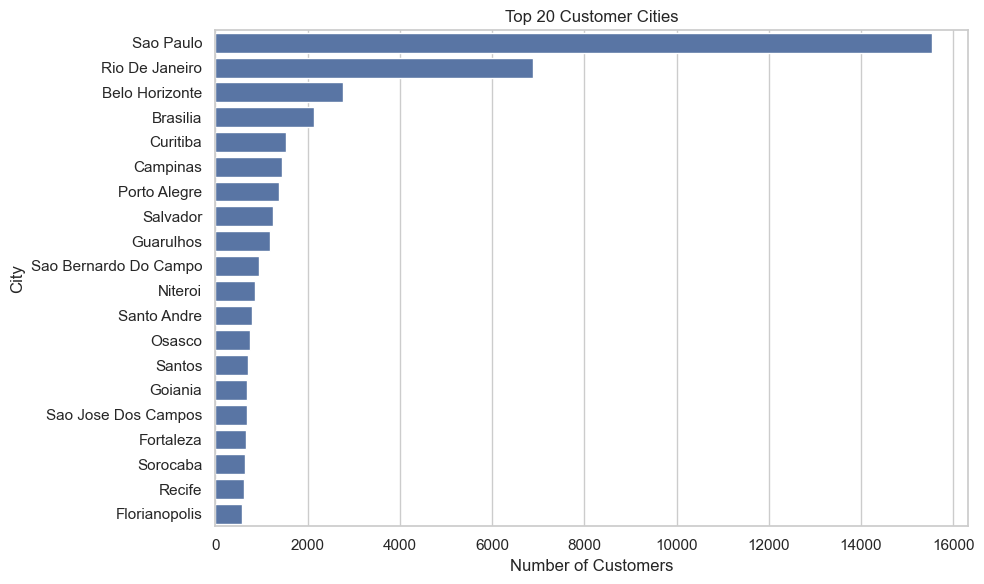

In [285]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
top_cities = customers['customer_city'].value_counts().nlargest(20)
sns.barplot(y=top_cities.index, x=top_cities.values)
plt.title('Top 20 Customer Cities')
plt.xlabel('Number of Customers')
plt.ylabel('City')
plt.tight_layout()
plt.show()

 Customer Distribution by State


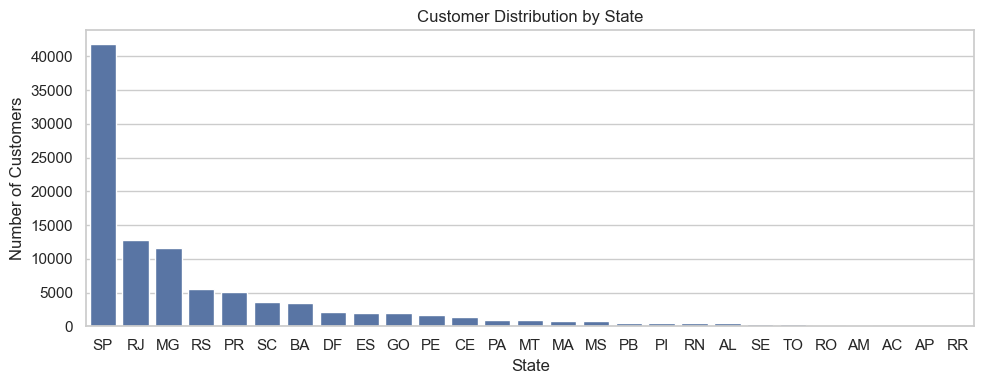

In [286]:
plt.figure(figsize=(10, 4))
sns.countplot(x='customer_state', data=customers, order=customers['customer_state'].value_counts().index)
plt.title('Customer Distribution by State')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

Geolocation dataset.....

In [287]:
geolocation.head()

,zip_code,latitude,longitude,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Sao Paulo,SP
1,1046,-23.546081,-46.644820,Sao Paulo,SP
2,1046,-23.546129,-46.642951,Sao Paulo,SP
3,1041,-23.544392,-46.639499,Sao Paulo,SP
4,1035,-23.541578,-46.641607,Sao Paulo,SP


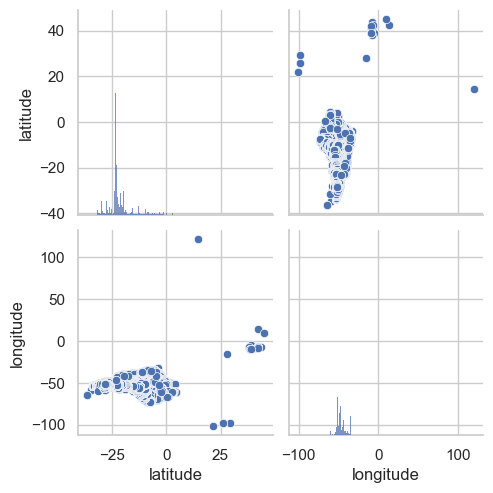

In [288]:
sns.pairplot(geolocation[['latitude','longitude','geolocation_city','geolocation_state']])

In [291]:

print(payments.columns)
print(products.columns)
print(reviews.columns)
print(orders_dataset.columns)
print(order_items.columns)
print(product_category_name.columns)
print(geolocation.columns)
print(customers.columns)

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')
Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')
Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'response_delay', 'has_message'],
      dtype='object')
Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'approval_time_hours', 'carrier_delivery_time_hours',
       'customer_delivery_time_hours', 'delay_hours'],
      dtype='object')
Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
 

VISUALISING COMBIND DATASETS......

Start with orders — the central dataset.

Merge customers → get who made the order.

Merge order_items → get what was ordered and which seller supplied it.

Merge products → get product details.

Merge product_category_name_translation → make categories readable.

Merge sellers → get seller location info.

Merge payments → get order value, payment type, installments.

Merge reviews → get customer feedback.

In [292]:
# Fix BOM column in product category translation
product_category_name.rename(columns={'ï»¿product_category_name': 'product_category_name'}, inplace=True)

# Drop unnecessary columns in customers
customers.drop(columns=['Unnamed: 0'], inplace=True)

# Merge datasets step by step
orders_customers = orders_dataset.merge(customers, on='customer_id', how='left')
orders_items = orders_customers.merge(order_items, on='order_id', how='left')
orders_products = orders_items.merge(products, on='product_id', how='left')
orders_products = orders_products.merge(product_category_name, on='product_category_name', how='left')
orders_sellers = orders_products.merge(sellers, on='seller_id', how='left')
orders_payments = orders_sellers.merge(payments, on='order_id', how='left')
master_df = orders_payments.merge(reviews[['order_id', 'review_score']], on='order_id', how='left')


C:\Users\rs573\AppData\Local\Temp\ipykernel_27056\830054366.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_state.index, y=revenue_by_state.values, palette='viridis')


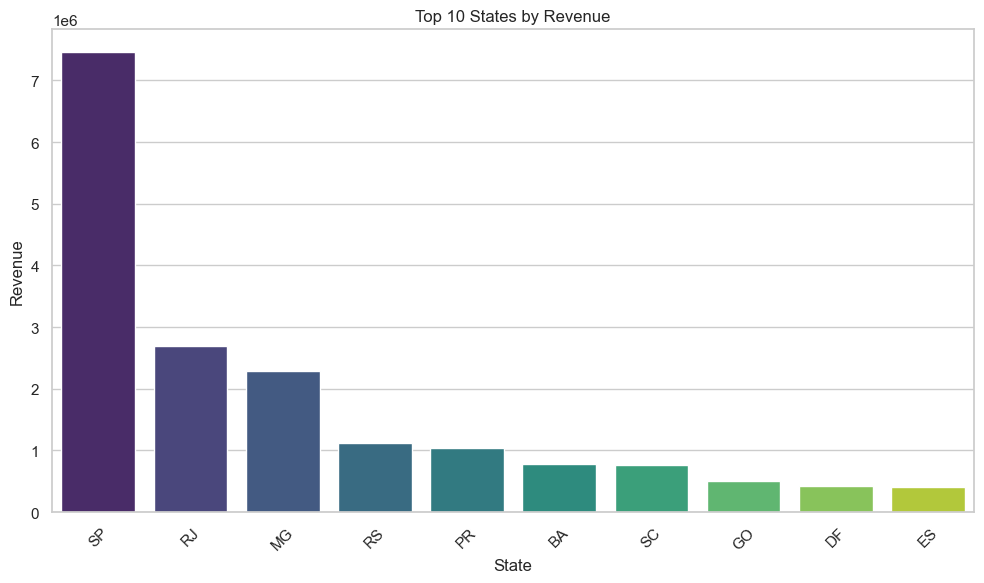

C:\Users\rs573\AppData\Local\Temp\ipykernel_27056\830054366.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_review.index, y=avg_review.values, palette='magma')


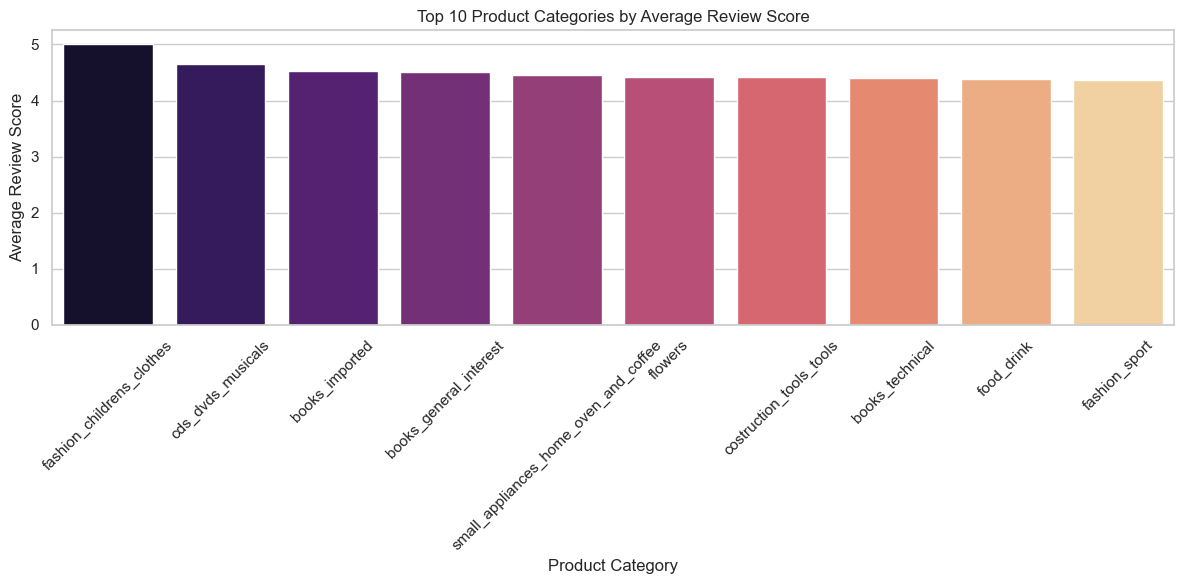

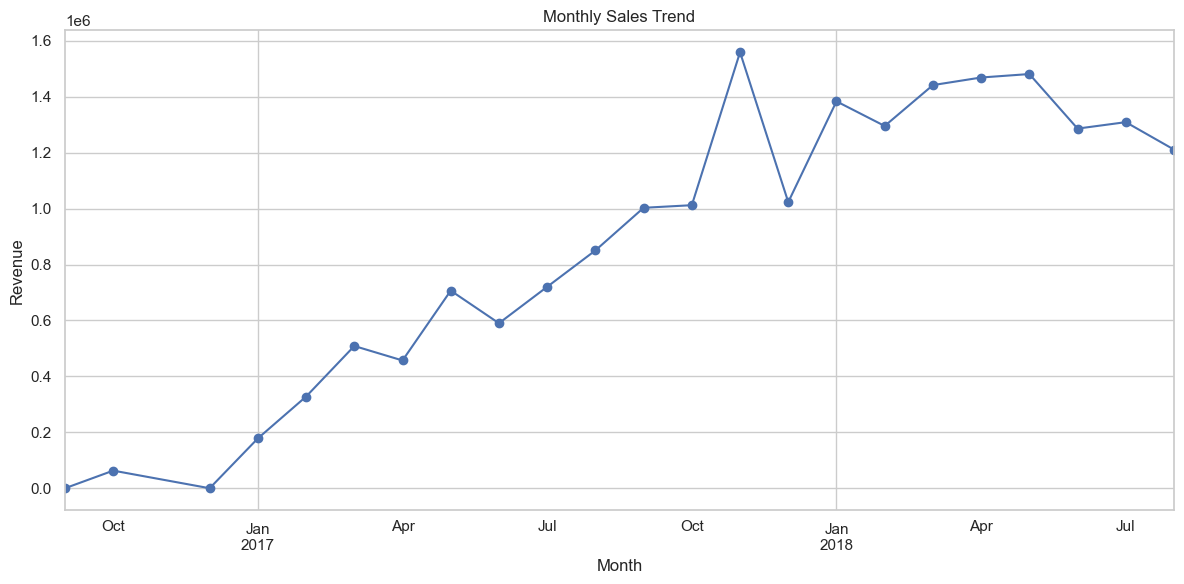

C:\Users\rs573\AppData\Local\Temp\ipykernel_27056\830054366.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sellers.index, y=top_sellers.values, palette='coolwarm')


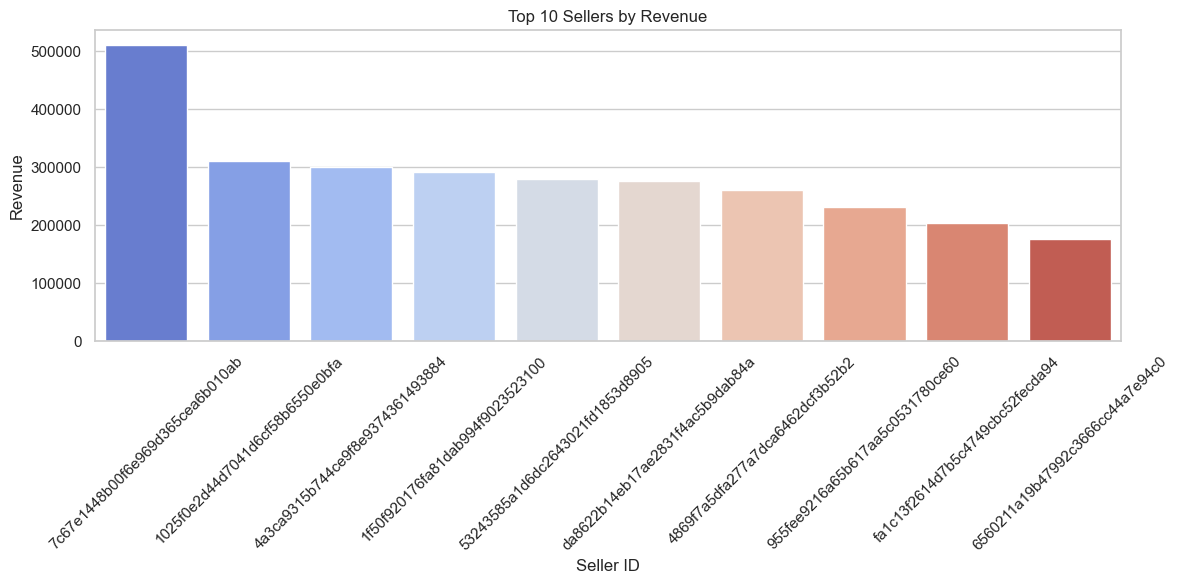

In [293]:


sns.set(style="whitegrid")  # clean styling

# =========================================
# 1️⃣ Top 10 States by Revenue
# =========================================
revenue_by_state = master_df.groupby('customer_state')['payment_value'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=revenue_by_state.index, y=revenue_by_state.values, palette='viridis')
plt.title("Top 10 States by Revenue")
plt.xlabel("State")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# =========================================
# 2️⃣ Average Review Score by Product Category
# =========================================
avg_review = master_df.groupby('product_category_name_english')['review_score'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=avg_review.index, y=avg_review.values, palette='magma')
plt.title("Top 10 Product Categories by Average Review Score")
plt.xlabel("Product Category")
plt.ylabel("Average Review Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# =========================================
# 3️⃣ Monthly Sales Trend
# =========================================
# Convert order_purchase_timestamp to datetime
master_df['order_purchase_timestamp'] = pd.to_datetime(master_df['order_purchase_timestamp'])

# Group by month
monthly_sales = master_df.groupby(master_df['order_purchase_timestamp'].dt.to_period('M'))['payment_value'].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line', marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()


# =========================================
# 4️⃣ Top 10 Sellers by Revenue
# =========================================
top_sellers = master_df.groupby('seller_id')['payment_value'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_sellers.index, y=top_sellers.values, palette='coolwarm')
plt.title("Top 10 Sellers by Revenue")
plt.xlabel("Seller ID")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


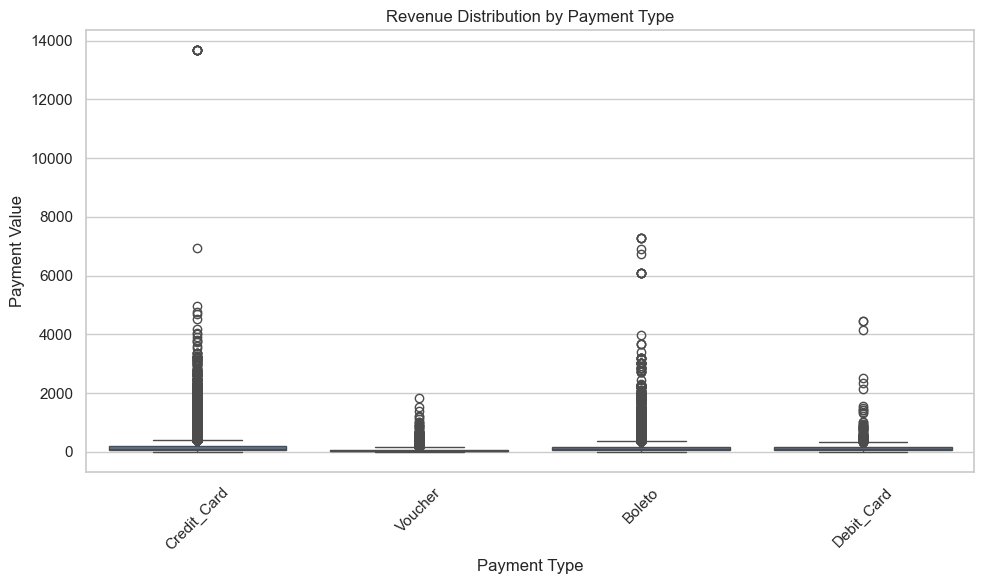

C:\Users\rs573\AppData\Local\Temp\ipykernel_27056\1986024395.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='review_score', data=master_df, palette='coolwarm')


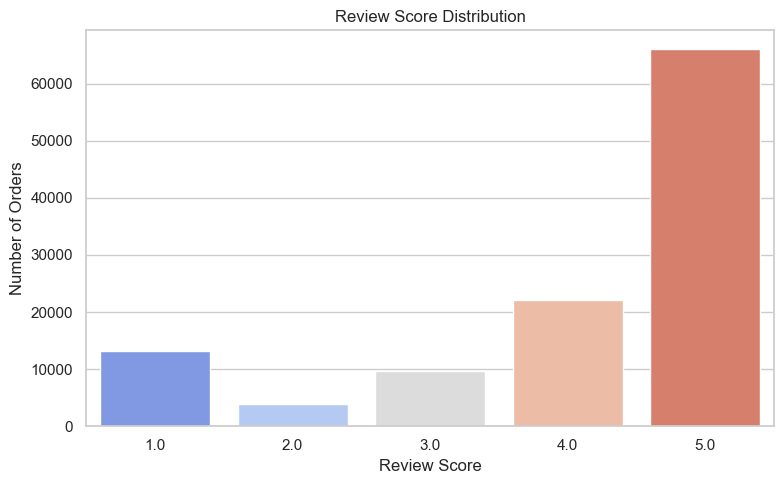

C:\Users\rs573\AppData\Local\Temp\ipykernel_27056\1986024395.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='Spectral')


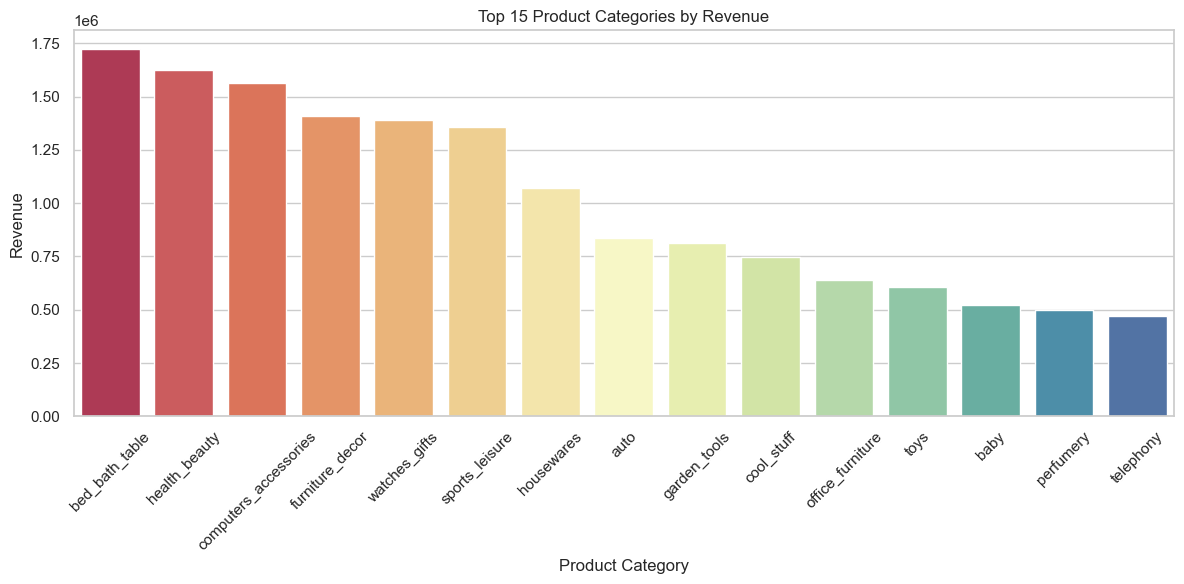

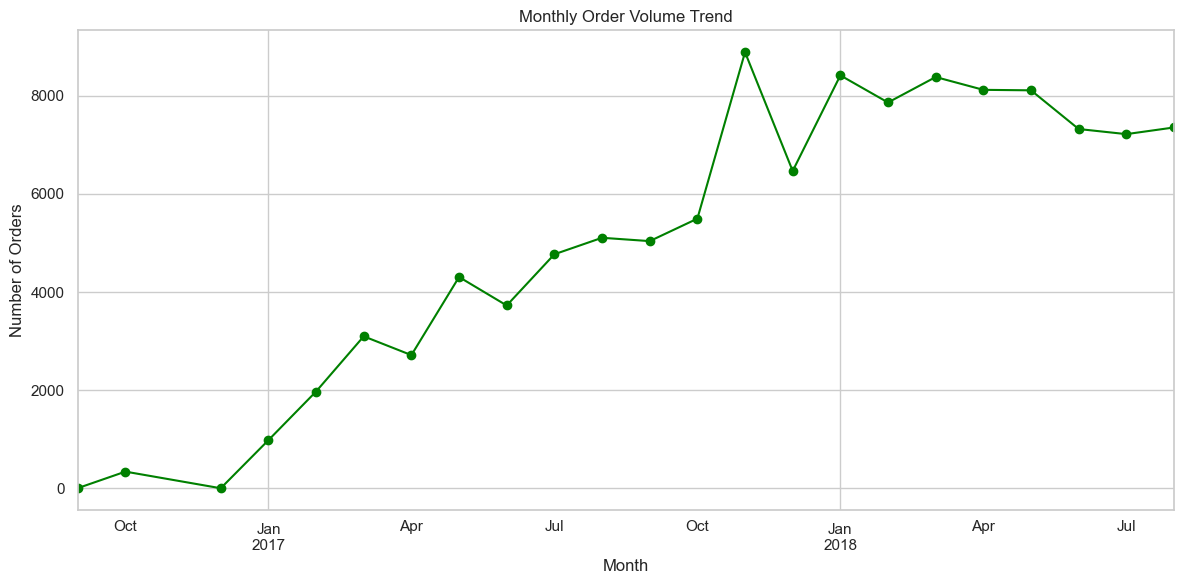

C:\Users\rs573\AppData\Local\Temp\ipykernel_27056\1986024395.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette='viridis')


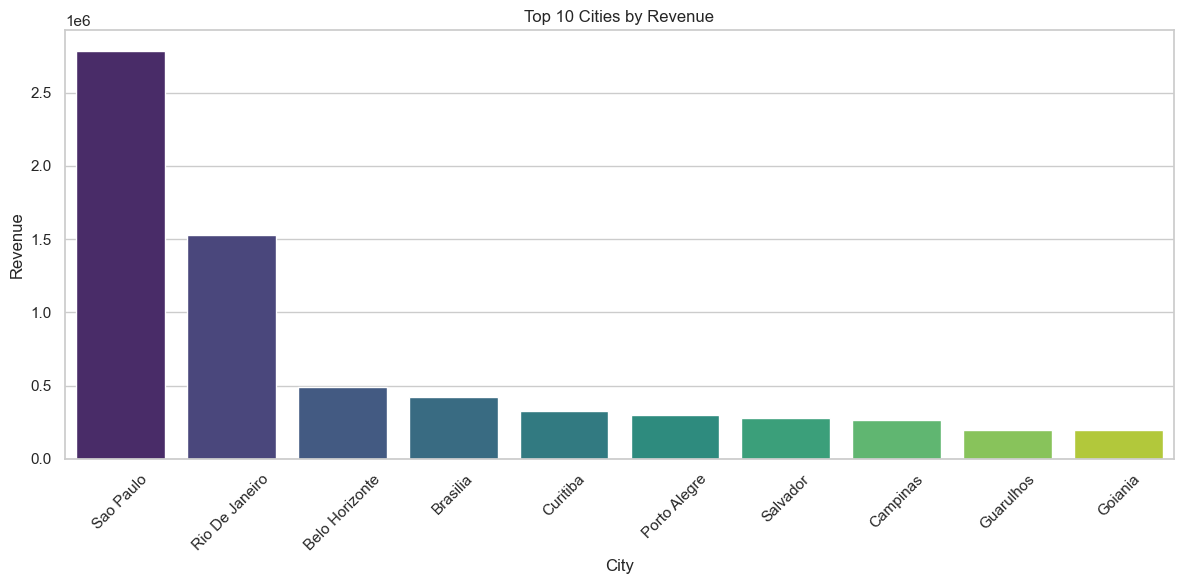

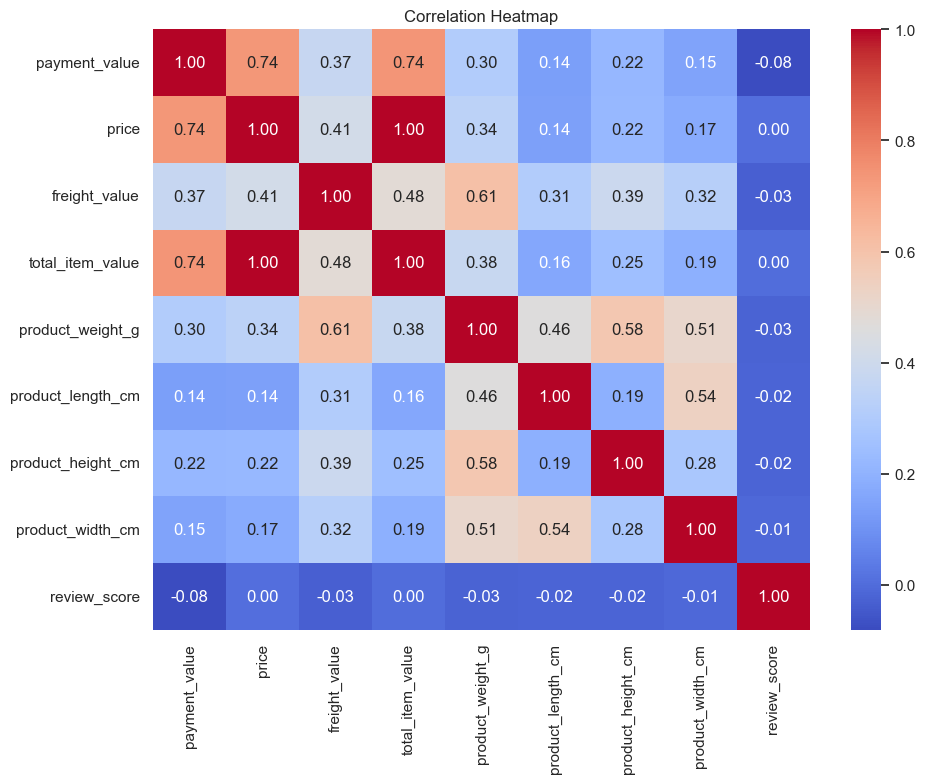

In [294]:


sns.set(style="whitegrid")  # clean styling

# =========================================
# 5️⃣ Revenue Distribution by Payment Type
# =========================================
plt.figure(figsize=(10,6))
sns.boxplot(x='payment_type', y='payment_value', data=master_df)
plt.title("Revenue Distribution by Payment Type")
plt.xlabel("Payment Type")
plt.ylabel("Payment Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# =========================================
# 6️⃣ Review Score Distribution
# =========================================
plt.figure(figsize=(8,5))
sns.countplot(x='review_score', data=master_df, palette='coolwarm')
plt.title("Review Score Distribution")
plt.xlabel("Review Score")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()


# =========================================
# 7️⃣ Top 15 Product Categories by Revenue
# =========================================
top_categories = master_df.groupby('product_category_name_english')['payment_value'].sum().sort_values(ascending=False).head(15)

plt.figure(figsize=(12,6))
sns.barplot(x=top_categories.index, y=top_categories.values, palette='Spectral')
plt.title("Top 15 Product Categories by Revenue")
plt.xlabel("Product Category")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# =========================================
# 8️⃣ Monthly Order Volume Trend
# =========================================
monthly_orders = master_df.groupby(master_df['order_purchase_timestamp'].dt.to_period('M'))['order_id'].count()

plt.figure(figsize=(12,6))
monthly_orders.plot(kind='line', marker='o', color='green')
plt.title("Monthly Order Volume Trend")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.grid(True)
plt.tight_layout()
plt.show()


# =========================================
# 9️⃣ Top 10 Cities by Revenue
# =========================================
top_cities = master_df.groupby('customer_city')['payment_value'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_cities.index, y=top_cities.values, palette='viridis')
plt.title("Top 10 Cities by Revenue")
plt.xlabel("City")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# =========================================
# 🔟 Correlation Heatmap
# =========================================
numeric_cols = ['payment_value', 'price', 'freight_value', 'total_item_value', 
                'product_weight_g', 'product_length_cm', 'product_height_cm', 
                'product_width_cm', 'review_score']

plt.figure(figsize=(10,8))
sns.heatmap(master_df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()
